In [53]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
from collections import Counter
from konlpy.tag import Okt
from konlpy.tag import Kkma
import operator
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow import keras

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic

In [54]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

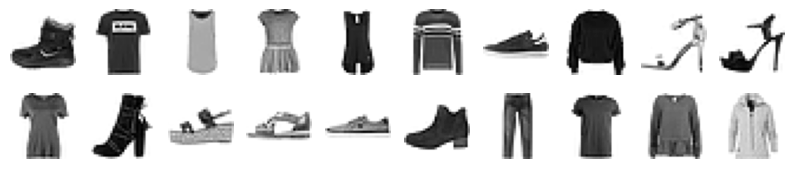

In [55]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,10,figsize=(10,2))
for i in range(2):     
     for j in range(10):
          axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')
          axs[i,j].axis('off')
plt.show()

In [56]:
# train 세트 - train세트,검증세트,test세트
# 표준화작업
train_scaled = train_input/255
train_scaled,val_scaled,train_target, val_target = train_test_split(
     train_scaled,train_target,test_size=0.2,random_state=42
)

In [57]:
# train_scaled.reshape(-1,28*28*3)

1차 합성곱 층을 생성

In [58]:
# 1차 합성곱 신경망(CNN)
model = keras.Sequential()
# padding='same' : 패딩사용 , valid : 패딩사용하지 않음
# input_shape = (28,28,1), 사이즈 28*28 그레이색상 1, (28,28,3) - 사이즈 28*28,RGB색상 3개
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',
          input_shape=(28,28,1)))
# 최대 풀링 : 겹치는 거 없이 진행
model.add(keras.layers.MaxPooling2D(2))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# 2차 합성곱 신경망(CNN)
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))

# 최대 풀링 : 겹치는 거 없이 진행
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten()) # 1차원으로 모양이 바뀜
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [60]:
model.summary()
# MaxPooling2D -> 사이즈가 절반으로 변경
# Flatten : 1차원 행렬로 변경 14*14*32

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# 딥러닝 훈련
# 모델결정 model = keras.Sequential()
# 합성곱 신경망 (CNN)
# 1차 합성곱 신경망
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
#                                input_shape=(28,28,1))
# 최대풀링 model.add(keras.layers.MaxPooling2D(2))
# 2차 합성곱 신경망
# model.add( keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same') )
# model.add(keras.layers.MaxPooling2D(2))
# model.add(keras.layers.Flatten()) # 1차원행렬
# model.add(keras.layers.Dense(100,activation='relu'))
# model.add(keras.layers.Dropout(0.4))
# model.add(keras.layers.Dense(10,activation='softmax'))
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

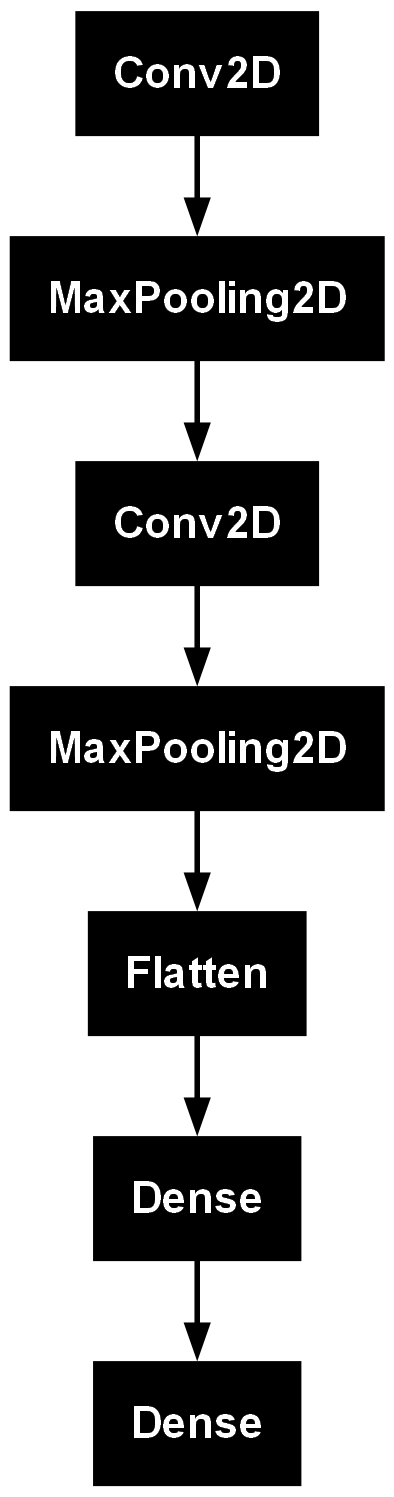

In [62]:
keras.utils.plot_model(model)

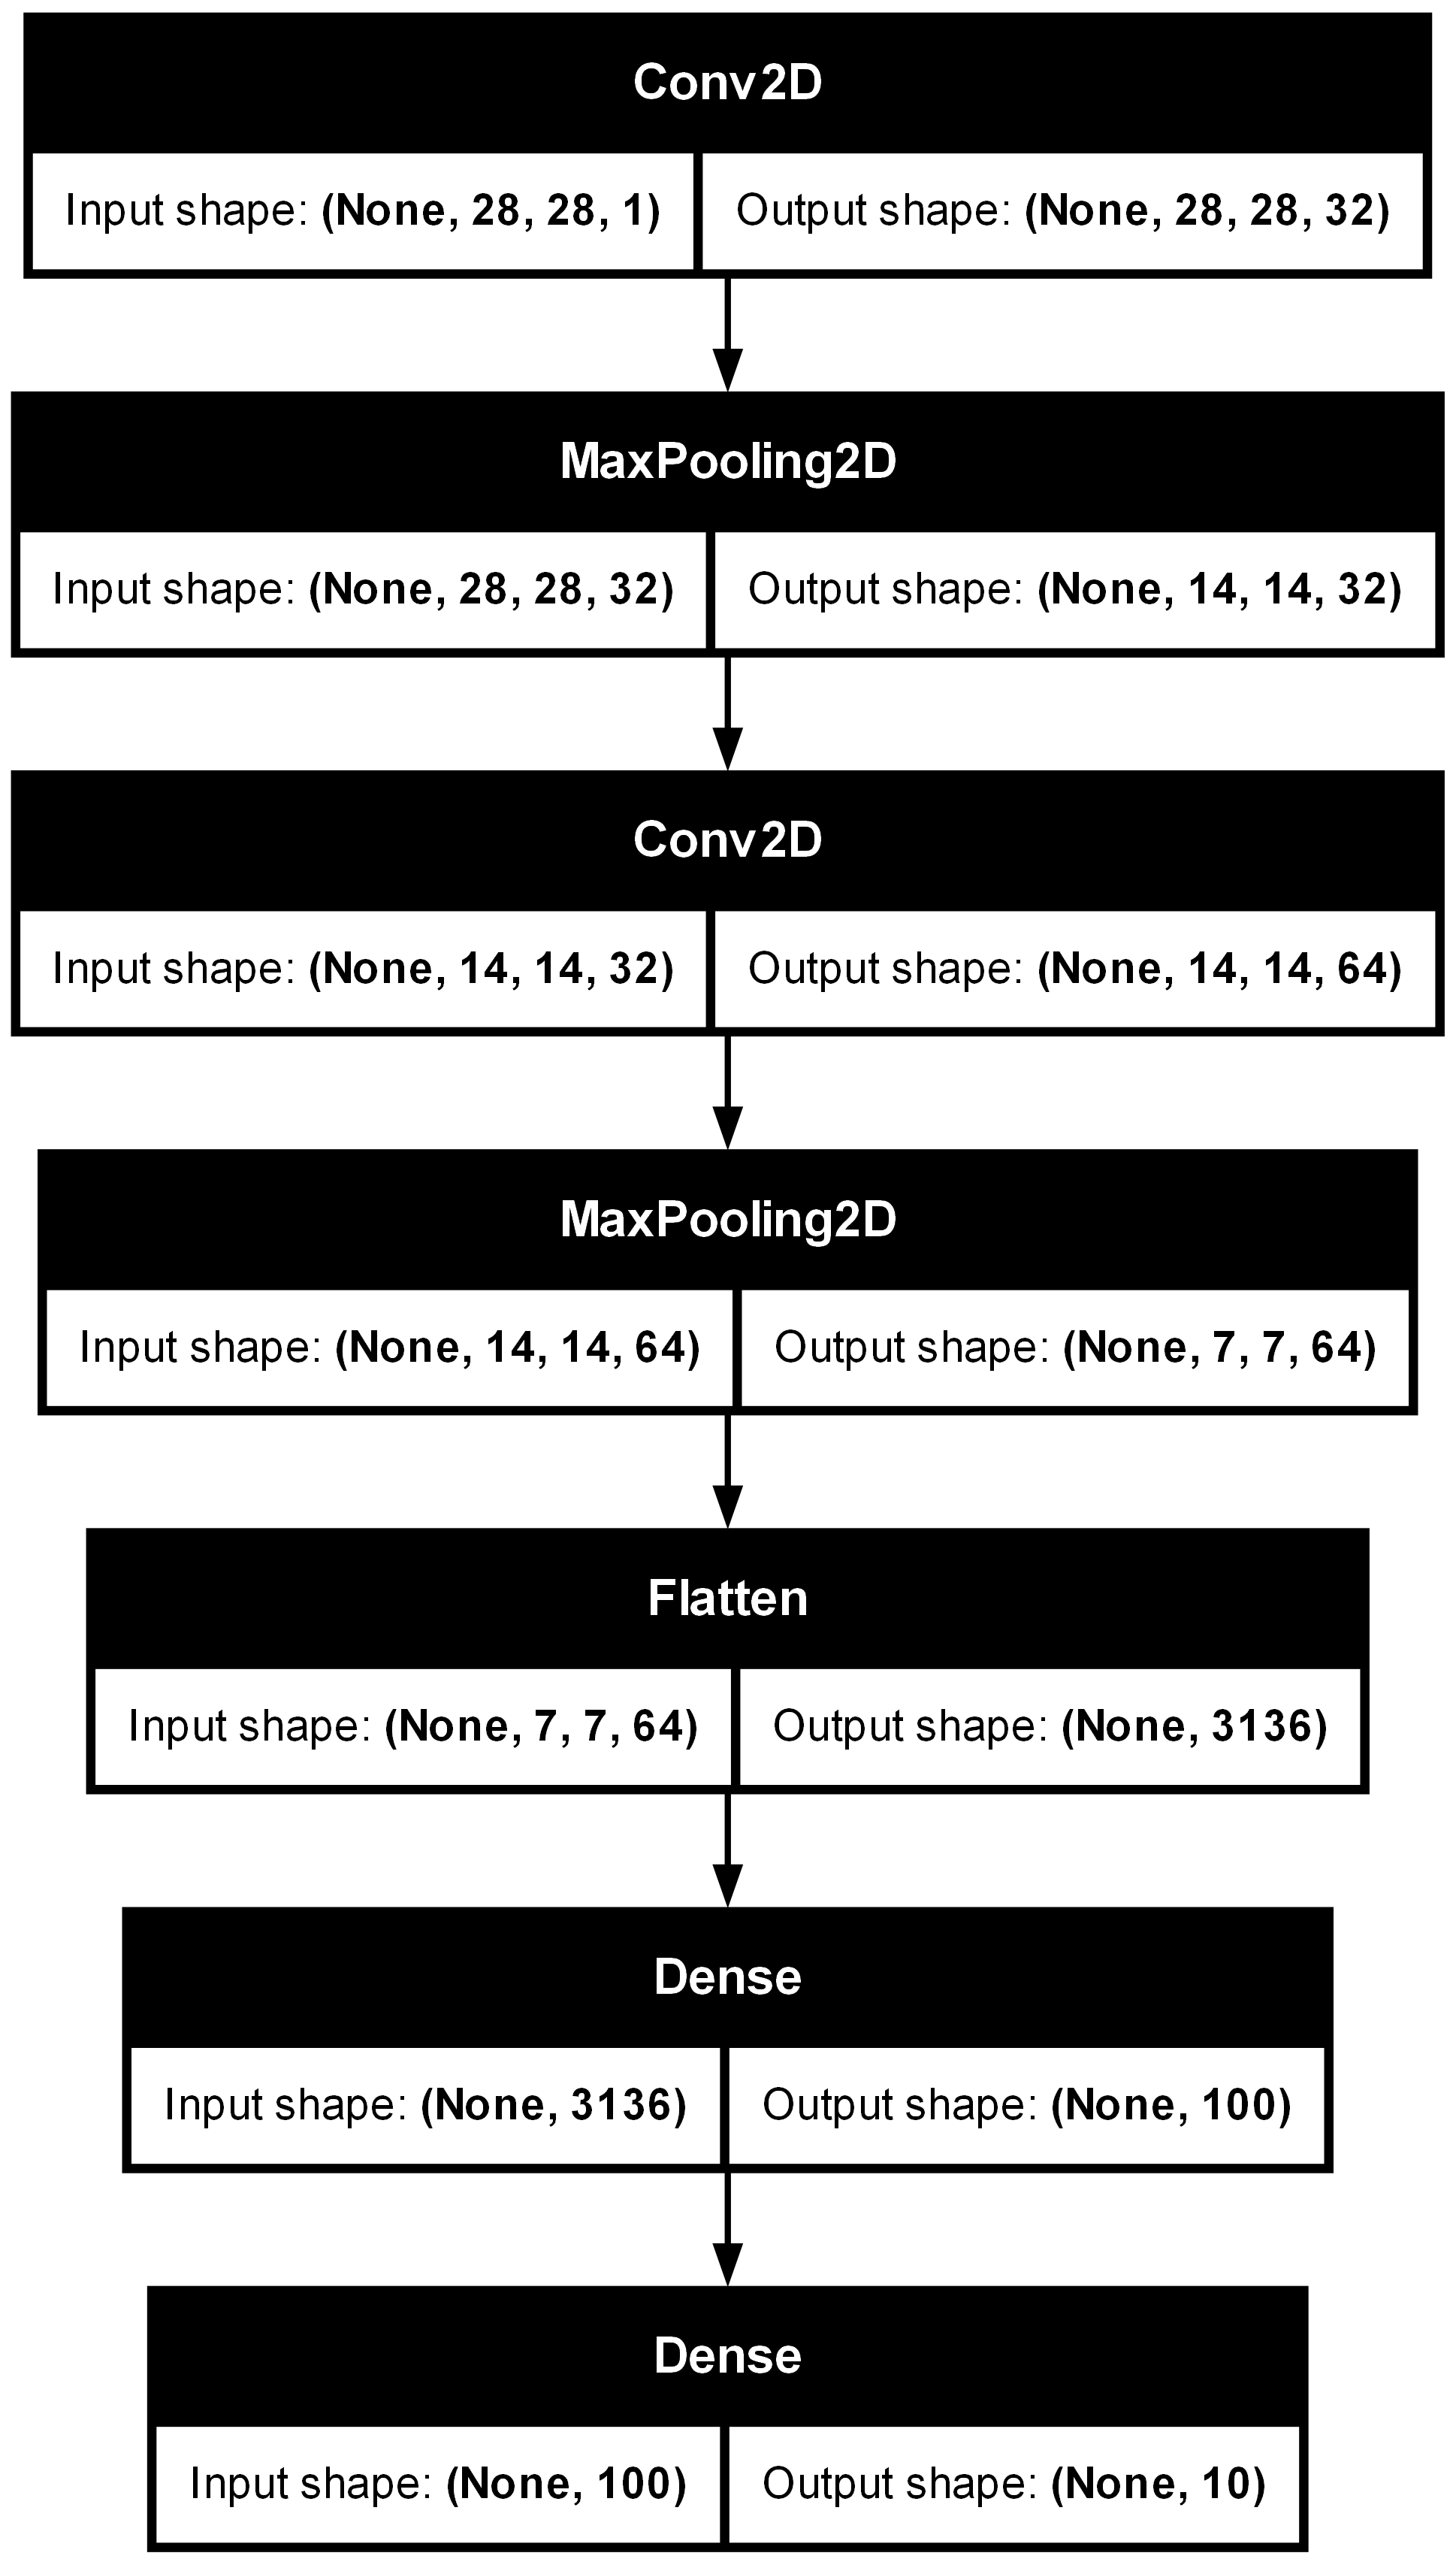

In [63]:
keras.utils.plot_model(model,show_shapes=True, to_file='cnn_a.png',dpi=300)

In [83]:
# 3차원 표준화 
train_sacled = train_input.reshape(-1,28,28,1)/255

In [102]:
train_scaled.shape

(30720, 28, 28)

In [103]:
train_target.shape

(30720,)

In [84]:
# train 세트 - train세트,검증세트,test세트
# 표준화작업

train_scaled,val_scaled,train_target, val_target = train_test_split(
     train_scaled,train_target,test_size=0.2,random_state=42
)

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9558 - loss: 0.1194 - val_accuracy: 0.9540 - val_loss: 0.1271
Epoch 2/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9637 - loss: 0.0981 - val_accuracy: 0.9493 - val_loss: 0.1362
Epoch 3/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9717 - loss: 0.0764 - val_accuracy: 0.9527 - val_loss: 0.1355


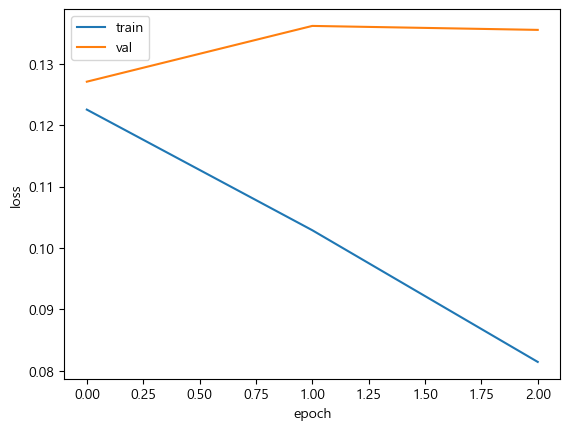

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [87]:
# stop 위치 출력
early_stopping_cb.stopped_epoch

2

In [88]:
val_scaled[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5372549 , 0.8       , 0.83529412, 0.83137255,
        0.74117647, 0.52156863, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.4745098 ,
        0.94509804, 0.96078431, 0.92156863, 0.7372549 , 0.78431373,
        0.89411765, 0.89803922, 0.96078431, 0.49803922, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10588235, 0.58039216, 0.84313725, 0.90980392,
        0.85882353, 0.9254902 , 0.96470588, 0.97254902, 0.97647059,
        0.9372549 , 0.8823

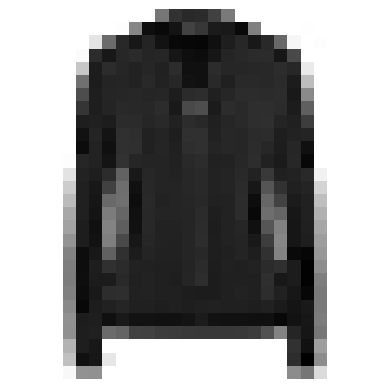

In [89]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()

In [90]:
predict = model.predict(val_scaled[0:1]) # 3차원 행렬형태
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[1.0720592e-04 1.2776861e-06 2.3300584e-01 1.7745977e-07 7.0079166e-01
  2.5976911e-07 6.6093154e-02 3.2662658e-08 3.1988304e-07 1.1653901e-07]]


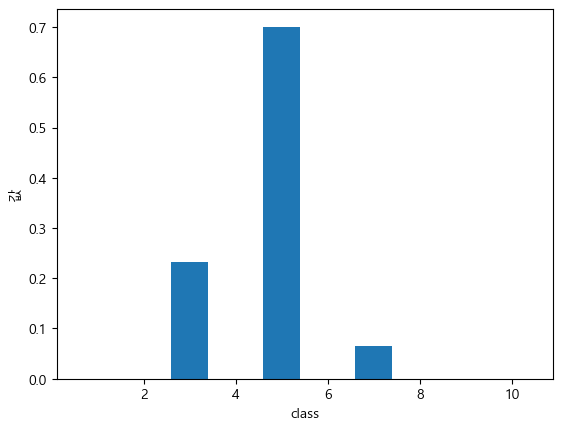

In [91]:
plt.bar(range(1,11),predict[0])
plt.xlabel('class')
plt.ylabel('값')
plt.show()

In [92]:
model.evaluate(val_scaled,val_target)

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.1245


[0.12709206342697144, 0.9540364742279053]

In [93]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [94]:
print(classes[np.argmax(predict)]) # np.argmax 최대값의 index값을 리턴

코트


In [100]:
# test세트 검증 - 3차원 행렬도 변경해서 test진행해야함
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [101]:
model.evaluate(test_scaled,test_target)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None